In [1]:
def printexp(tree):
    sVal = ""
    if tree:
        sVal = '(' + printexp(tree.getLeftChild())
        sVal = sVal + str(tree.getRootVal())
        sVal = sVal + printexp(tree.getRightChild())+')'
    return sVal

In [2]:
def postorder(tree):
    if tree != None:
        postorder(tree.getLeftChild())
        postorder(tree.getRightChild())
        print(tree.getRootVal())

In [3]:
from pythonds.basic import Stack
from pythonds.trees import BinaryTree
def buildParseTree(fpexp):
    fplist = fpexp.split()
    pStack = Stack()
    eTree = BinaryTree('$')
    pStack.push(eTree)
    currentTree = eTree
    for i in fplist:
        if i == '(':
            currentTree.insertLeft('')
            pStack.push(currentTree) 
#            print(currentTree.getRootVal())
            currentTree = currentTree.getLeftChild()
#            print(printexp(currentTree)+'-1')
        elif i in ['+', '-', '*', '/']:
#            print(printexp(eTree)+'0')
            currentTree.setRootVal(i)
            currentTree.insertRight('')
            pStack.push(currentTree)
#            print(printexp(currentTree)+'0')
            currentTree = currentTree.getRightChild()
        elif i == ')':
            pass
        elif i in ['0','1','2','3','4','5','6','7','8','9']:
            try:    
                currentTree.setRootVal(int(i))
                parent=pStack.pop()
#                print(parent.getRootVal())
                if parent.getRootVal() == '':
                    currentTree = parent
#                    print(printexp(currentTree)+'1')
#                    print(printexp(eTree)+'1')
#                elif parent.getRootVal() in ['+', '-', '*', '/']:
                elif (parent.getRootVal() in ['+', '-', '*', '/']):
                    currentTree = parent
                    parent=pStack.pop()
                    if parent.getRootVal() == '':
                        currentTree = parent
                    else:
                        pStack.push(parent)
                        empt = BinaryTree('')
                        empt.insertLeft(currentTree)
                        if parent.getLeftChild()==currentTree:
                            parent.insertLeft(empt)
                        else:
                            parent.insertRight(empt)
                        currentTree = empt
#                        print(printexp(currentTree)+'2')
                else:
                    pStack.push(parent)
                    empt = BinaryTree('')
                    empt.insertLeft(currentTree)
                    if parent.getLeftChild()==currentTree:
                        parent.insertLeft(empt)
                    else:
                        parent.insertRight(empt)
                    currentTree = empt
#                    print(printexp(currentTree)+'3')            
            except ValueError:
                raise ValueError("token '{}' is not a valid integer".format(i))
    eTree=eTree.getLeftChild()
    if currentTree.getRootVal() == "":
        parent=pStack.pop() 
        kid = currentTree.getLeftChild()
        parent.insertRight(kid)
    if eTree.getRootVal() == '':
        eTree=eTree.getLeftChild()
    return eTree

expression="( ( 1 * 2 + 3 ) * 4 + 5 ) * ( 6 + ( 7 * 8 + 9 ) )"
exp = buildParseTree(expression)
exp.postorder()
printexp(exp)

1
2
*
3
+
4
*
5
+
6
7
8
*
9
+
+
*


'((((((1)*(2))+(3))*(4))+(5))*((6)+(((7)*(8))+(9))))'

In [4]:
import json
import matplotlib.pyplot as plt

In [5]:
draws =[]
stocks=[]
head = open('D:/2021spring/statistic compute with python/hw04/shapes.txt')
for line in head:
    line = json.loads(line)
    draw = line["drawing"]
    stock = len(draw)
    draws.append(draw)
    stocks.append(stock)

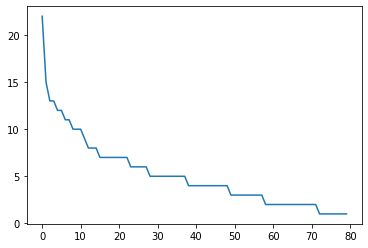

In [6]:
stocks.sort(reverse=True)
plt.plot(stocks)

<ipython-input-8-d1576711248a>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8,10,i+1)


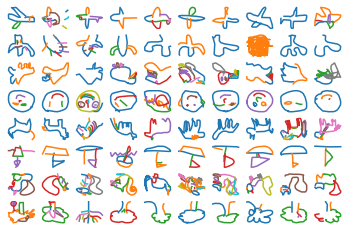

In [8]:
for i in range(len(draws)):
    for j in range(len(draws[i])):
        x=draws[i][j][0]
        y=draws[i][j][1]
        plt.subplot(8,10,i+1) 
        plt.plot(x,y)
        plt.axis('off')

the binary tree has

1)A unique path traverses from the root to each node.

2)If each node in the tree has a maximum of two children. 

a height n binary tree: 

1. we can left insert a n-1 height binary tree to a height 0 binary tree

2. we can right insert a n-1 height binary tree to a height 0 binary tree

3. we can both side insert a n-1 height binary tree to a height 0 binary tree

then we have:

problem a):

$a_0 = 1$

$a_1 = a_0 + a_0 + a_0^2 = 3$

$a_2 = 2*a_1 + a_1^2 = 15 $

$a_3 = 2*a_2 + a_2^2 = 255$

...........

$a_n = 2a_{n-1}+a_{n-1}^2$

In [7]:
def numTree(x):
    a=[0]*(x+1)
    if x==0:
        a[x]=1
        return a[x]
    else:
        a[x]=2*numTree(x-1)+numTree(x-1)**2
    return a[x]

In [8]:
print('n=4,the number is:',numTree(4))
print('n=5,the number is:',numTree(5))

n=4,the number is: 65535
n=5,the number is: 4294967295
